# TP 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from breastcancer_utils import *

## 1 Données

In [2]:
X, y = load_breastcancer("wdbc_M1_B0.data")

## 2 Méthode du sous-gradient

### Question 2.1

On note $\rho = min_{v\in\mathbb{R}^m, a\in\mathbb{R}, \xi\in\mathbb{R}^n}\dfrac{1}{2}\displaystyle\sum_{j=1}^m v_j^2 + c\displaystyle\sum_{i=1}^n \xi_i$ sous les contraintes indiquées et $\lambda = min_{v\in\mathbb{R}^m, a\in\mathbb{R}}\dfrac{1}{2}\displaystyle\sum_{j=1}^m v_j^2 + c\displaystyle\sum_{i=1}^n max(0, 1-y_i(x_i^\top v+a))$ <br/>
Il est clair que $\lambda \leqslant \rho$ <br/>
Soit $v\in\mathbb{R}^m$, $a\in\mathbb{R}$ <br/>
On pose $\xi_i = max(0, 1-y_i(x_i^\top v+a))$ <br/>
On a que $\forall i\in \{1,...,n \}, \xi_i \geqslant 0$ et $\xi_i \geqslant 1-y_i(x_i^\top v+a)$
$\begin{eqnarray*}
\dfrac{1}{2}\displaystyle\sum_{j=1}^m v_j^2 + c\displaystyle\sum_{i=1}^n max(0, 1-y_i(x_i^\top v+a)) &=& \dfrac{1}{2}\displaystyle\sum_{j=1}^m v_j^2 + c\displaystyle\sum_{i=1}^n \xi_i \\
&\geqslant& \rho \\
\end{eqnarray*}$ <br/>
D'où $ \dfrac{1}{2}\displaystyle\sum_{j=1}^m v_j^2 + c\displaystyle\sum_{i=1}^n max(0, 1-y_i(x_i^\top v+a)) \geqslant \rho$ ie $\lambda\geqslant \rho$ <br/>
Donc $\rho = \lambda$

### Question 2.2

In [3]:
def h(z):
    return max(0,1-z)

In [4]:
def drondh(z):
    if z<1:
        return -1
    elif z>1:
        return 0

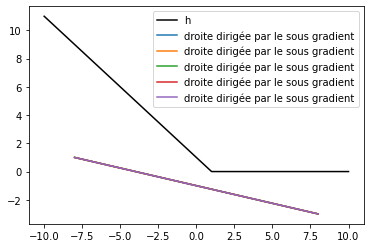

In [5]:
li_z = np.linspace(-10,10,1000)
li_z2 = np.linspace(-8, 8, 5)
plt.plot(li_z,[h(li_z[i]) for i in range(len(li_z))],color = 'black', label='h')
for i in range(len(li_z2)):
    li_image = [h(li_z[i])+(k-li_z[i])*drondh(li_z[i]) for k in range(len(li_z2))]
    plt.plot(li_z2, li_image,label='droite dirigée par le sous gradient')
plt.legend()
plt.show()

### Question 2.3

On pose $N(v,a):= \dfrac{1}{2}\displaystyle\sum_{j=1}^m v_j^2$, $H(u:=(u_1,...,u_n)):= \displaystyle\sum_{i=1}^n max(0,1-u_i)$ et $M(v,a):= (y_i(x_i^\top v+a))_{1\leqslant i\leqslant n}$ <br/>
$M$ est clairement linéaire. <br/>
$N$ et $H$ sont aussi séparables évidemment. <br/>
On a donc $f(v,a) = N(v,a) + cH(M(v,a)) $ <br/>
Comme $0\in relint(domH -MdomN)$ <br/>
$\partial f(v,a) = \partial N(v,a) + cM^\top\partial H(M(v,a))$

$\partial N(v,a) = \{v_1\}\times...\times \{v_m\}$


In [6]:
### PENSER A METTRE LES SINGLETONS 0

$\partial H(u) = \{h(u_1)\}\times...\times \{h(u_n)\}$

### Question 2.4

In [7]:
def values(nu,a,c):
    f = (1/2)*np.sum(nu**2)
    for i in range(len(y)):
        f += c*h(y[i](X[0][i]*nu+a))
    ###
    return f, sub_grad_f

### Question 2.5

In [11]:
def sub_gradient(v_0, a_0, nb_iter):
    (v_0, a_0) = (0,0)
    (v_1, a_1) = (v_0, a_0) - 1*values(v_0,a_0,1)[1]
    for k in range(nb_iter):
        (v_0, a_0), (v_1, a_1) = (v_1, a_1), (v_0, a_0) - (1/(k+1))*values(v_0,a_0,1)[1]
    return v_1, a_1

## 3 Méthode du sous-gradient stochastique

### Question 3.1

$\begin{eqnarray}
\mathbb{E}[f_I(v,a)] &=& \dfrac{1}{2}\displaystyle\sum_{j=1}^m v_j^2 + cn\mathbb{E}[max(0,1-y_I(x_I^\top v + a))] \\
&=& \dfrac{1}{2}\displaystyle\sum_{j=1}^m v_j^2 + cn\displaystyle\int_0^1 max(0,1-y_u(x_u^\top v + a))du \\
&=& f(v,a) \\
\end{eqnarray}$

### Question 3.2

$f_i$ est la somme de fonctions convexe donc <br/>
$\partial f(v,a) = \partial N(v,a) + cn (y_i(x_i^\top v+a))^\top\partial h(y_i(x_i^\top v+a))$

### Question 3.3

In [9]:
def sub_gradient_stoch(v_0, a_0, step_size, nb_iter):
    (v_0, a_0) = (0,0)
    (v_1, a_1) = (v_0, a_0) - step_size*values(v_0,a_0,1)[1]
    for k in range(nb_iter):
        (v_0, a_0), (v_1, a_1) = (v_1, a_1), (v_0, a_0) - step_size*values(v_0,a_0,1)[1]
    return v_1, a_1

## 4 Méthode du lagrangien augmenté

### Question 4.1 

Le lagrangien du problème (1) s'écrit: <br/>
$L(v,a,\xi; \lambda, \mu) = \dfrac{1}{2}\displaystyle\sum_{j=1}^mv_j^2 + c\displaystyle\sum_{i=1}^n\xi_i + \displaystyle\sum_{i=1}^n \lambda_i(1-y_i(x_i^\top v+a)-\xi_i) - \displaystyle\sum_{i=1}^n \mu_i\xi_i$

### Question 4.2

On a $g(x,\phi) = \begin{cases}
-\dfrac{1}{2\rho}\phi^2+\dfrac{\rho}{2}(x+\rho^{-1}\phi)^2 & si x+\rho^{-1}\phi \geqslant 0 \\
-\dfrac{1}{2\rho}\phi^2 & sinon \\
\end{cases}$ <br/>
Donc $\nabla_xg(x,\phi) = \begin{cases}
\rho(x+\rho^{-1}\phi) & si x+\rho^{-1}\phi \geqslant 0 \\
0 & sinon \\
\end{cases}$ = $\rho max(0,x+\rho^{-1}\phi)$ <br/>
et $\nabla_\phi g(x,\phi) = \begin{cases}
-\dfrac{\phi}{\rho} + (x+\rho^{-1}\phi)=x & si x \geqslant -\rho^{-1}\phi \\
-\dfrac{\phi}{\rho} & sinon \\
\end{cases}$ = $ max(x,-\rho^{-1}\phi)$ <br/>

### Question 4.3

Il s'agit de la composition de fonctions convexes (donc encore convexes) et de leur combinaison linéaire à coefficients positifs ce qui conserve la convéxité. Les applications partielles de g sont donc encore convexes.

### Question 4.4

### Question 4.5

### Question 4.6

## 5 Comparaison 

### Question 5.1

La méthode du sous-gradient est la meilleure.